# Mangrove Cover Edge Detection

In this notebook, we will try to apply a scikit-learn edge detection algorithm to resolve and polygonize the edge of the mangrove covers obtained from chapter 1. These edge/mangrove coastlines will then be used in the C-STORM EWN Toolkit to accurately integrate the mangroves in our mesh.

In [1]:
import numpy as np
import xarray as xr
import rasterio as rio
from matplotlib import cm
import matplotlib.pyplot as plt

from scipy import ndimage as ndi
import skimage as ski

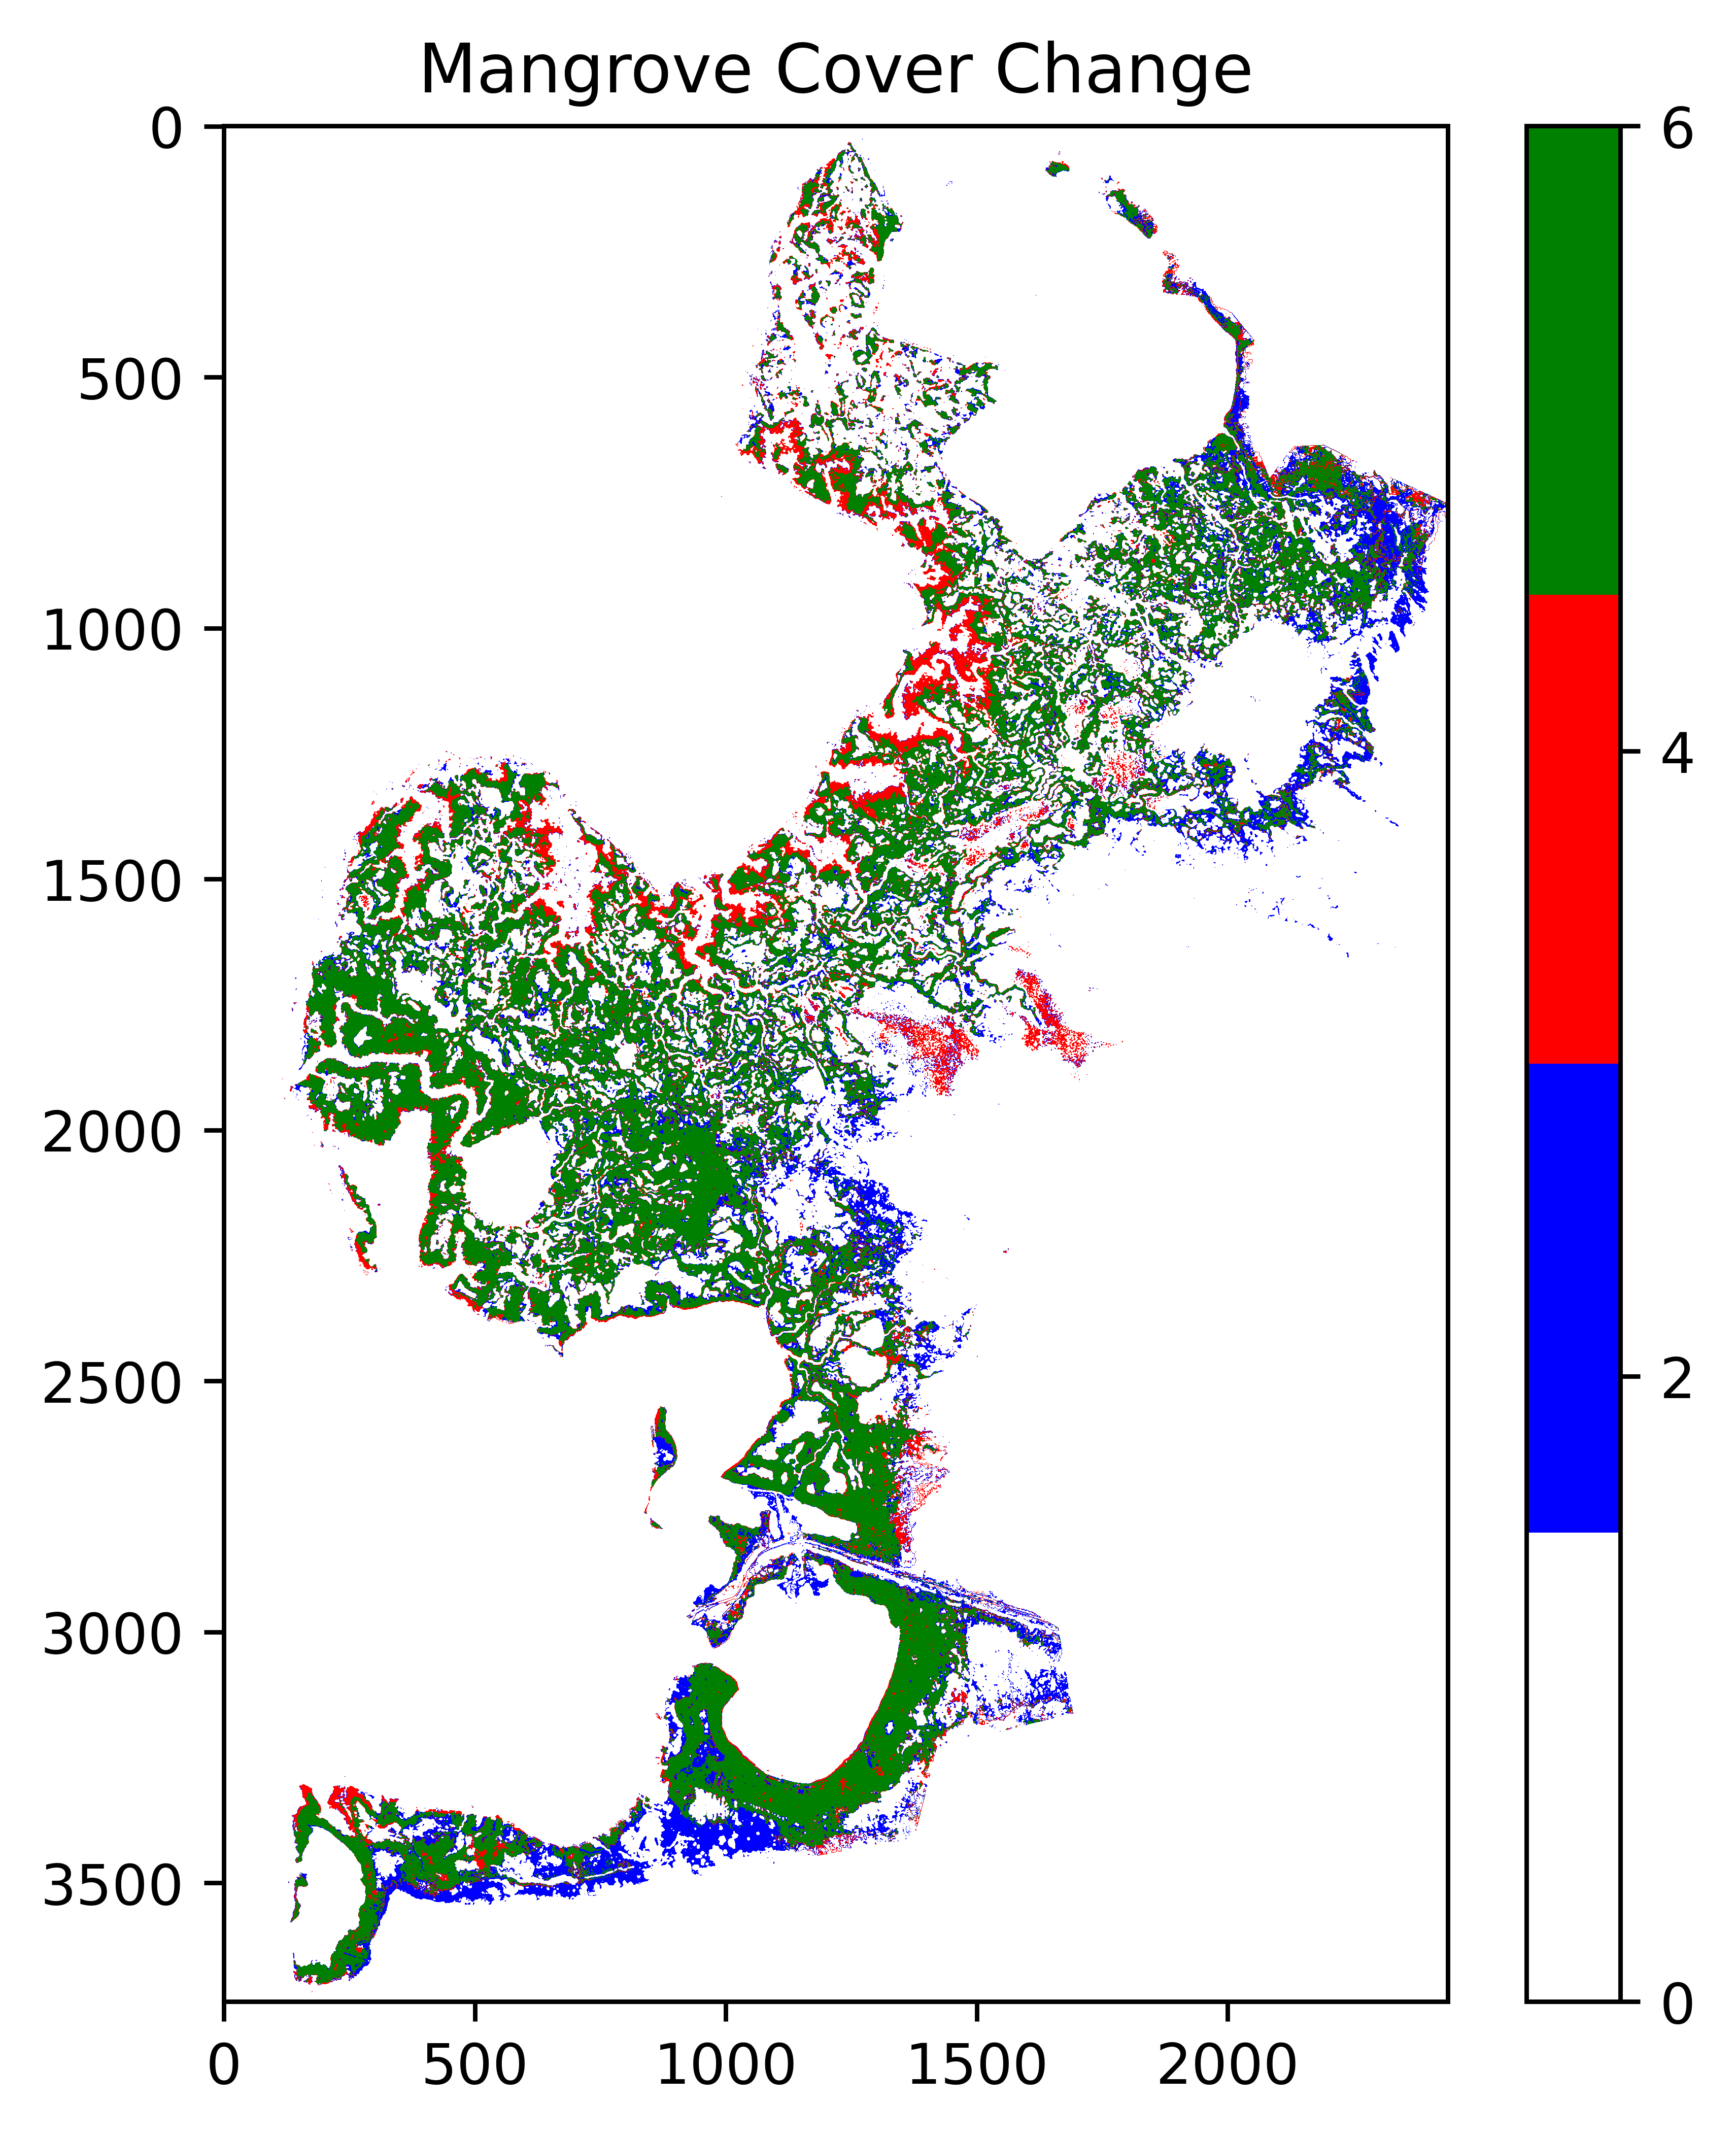

In [2]:
# Importing and Visualizing the Cover Change Raster
root = '../datasets/ch1_covers/'
change_raster = root + 'mangrove_cover_change.tif'
ds = rio.open(change_raster).read(1)

fig, ax = plt.subplots(figsize=(5,6), dpi=800)

cmap_discrete = cm.colors.ListedColormap(['white', 'blue', 'red', 'green'])
n = ax.imshow(ds, cmap=cmap_discrete)
ax.set_title('Mangrove Cover Change')
cbar = fig.colorbar(n, ticks=[0, 2, 4, 6])


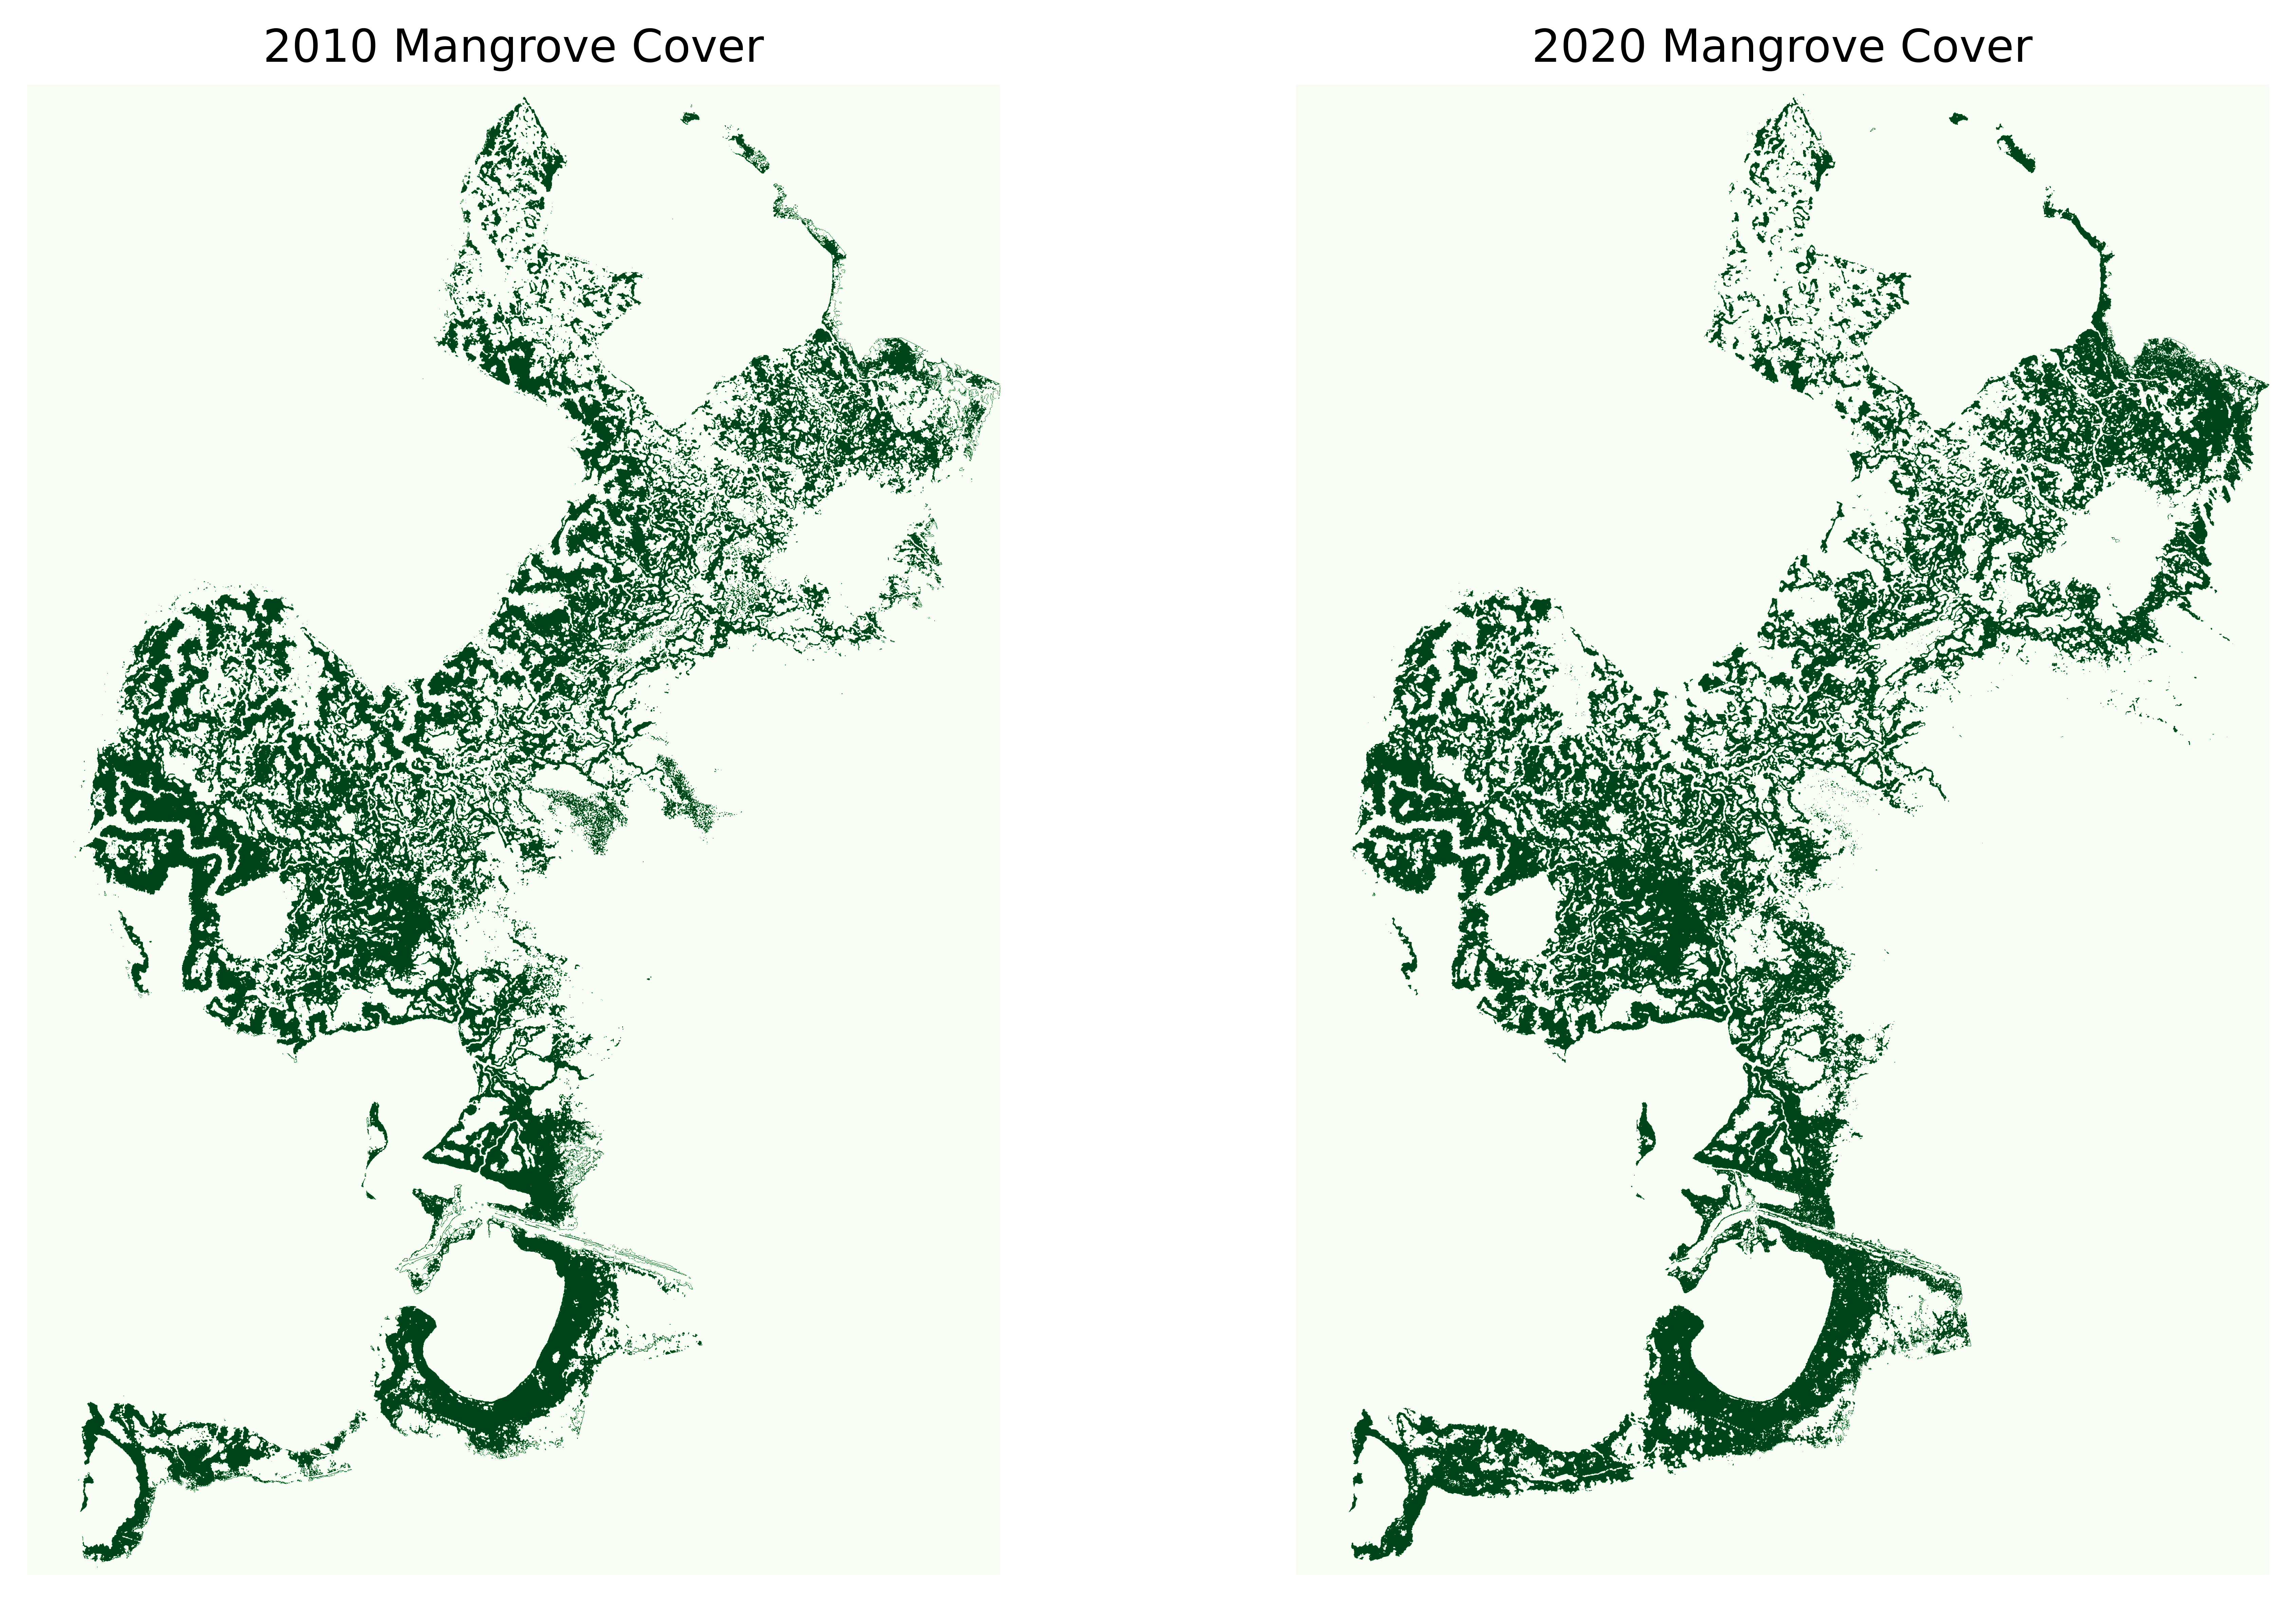

In [3]:
# Separating the Cover Change Raster into 2010 and 2020 Mangrove Cover
cover_2010 = np.where((ds == 4) | (ds == 6), 1, 0)
cover_2020 = np.where((ds == 2) | (ds == 6), 1, 0)

fig, axes = plt.subplots(1, 2, figsize=(10, 6), dpi=800)

axes[0].imshow(cover_2010, cmap='Greens')
axes[0].set_title('2010 Mangrove Cover')

axes[1].imshow(cover_2020, cmap='Greens')
axes[1].set_title('2020 Mangrove Cover')

for ax in axes:
    ax.axis('off')  
fig.tight_layout()

In [4]:
# Exporting cover_2010 and cover_2020 as GeoTIFFs
with rio.open(change_raster) as src:
    profile = src.profile
    profile.update(dtype=rio.uint8, count=1)

    # Export cover_2010
    with rio.open(root + 'cover_2010.tif', 'w', **profile) as dst:
        dst.write(cover_2010.astype(rio.uint8), 1)

    # Export cover_2020
    with rio.open(root + 'cover_2020.tif', 'w', **profile) as dst:
        dst.write(cover_2020.astype(rio.uint8), 1)

In [ ]:
# Segmenting cover_2010 as a binary image
binary_cover_2010 = cover_2010 > 0

# Finding edges using the Canny edge detection algorithm
edges_cover_2010 = ski.feature.canny(binary_cover_2010)

# Plotting the binary image and its edges
fig, axes = plt.subplots(1, 2, figsize=(10, 6), dpi=800)

axes[0].imshow(binary_cover_2010, cmap='gray')
axes[0].set_title('Binary 2010 Mangrove Cover')

axes[1].imshow(edges_cover_2010, cmap='gray')
axes[1].set_title('Edges of 2010 Mangrove Cover')

for ax in axes:
    ax.axis('off')
fig.tight_layout()